In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw11_v2_lstm_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(534, 13)


,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,sum
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,Manchester City,12.1,24.246344
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,Liverpool,12.4,23.847819
2,kevin_de bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,Manchester City,10.2,23.476229
3,sadio_mané,4.638364,4.476446,4.472850,4.407075,4.266582,0,0,0,1,Liverpool,11.9,22.261316
4,pierre-emerick_aubameyang,4.046014,3.921435,3.928114,3.877575,3.754090,0,1,0,0,Arsenal,11.1,19.527227


In [3]:
gw1_v1_player_predictions.rename(columns={'sum': 'predictions'}, inplace=True)

In [4]:
plot_df = pd.melt(gw1_v1_player_predictions[['name', 'GW_plus_1', 'GW_plus_2', 'GW_plus_3', 'GW_plus_4', 'GW_plus_5']], id_vars=['name'])
plot_df.rename(columns={'variable': 'GW', 'value': 'prediction'}, inplace=True)
plot_df.head()

,name,GW,prediction
0,raheem_sterling,GW_plus_1,5.055562
1,mohamed_salah,GW_plus_1,4.961739
2,kevin_de bruyne,GW_plus_1,4.883424
3,sadio_mané,GW_plus_1,4.638364
4,pierre-emerick_aubameyang,GW_plus_1,4.046014


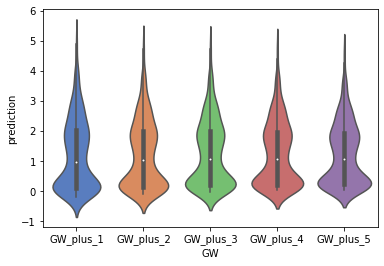

In [5]:
sns.violinplot(x="GW", y="prediction", data=plot_df, palette="muted", split=True)

In [6]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

__Need to do manual overwrite - looks like price just changed!__

In [7]:
gw10_team_selection = pd.read_parquet('data/gw_team_selections/gw10_v1_lstm_team_selections.parquet')
gw10_team_selection['in_current_team'] = 1
gw10_team_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,in_current_team
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
3,teemu_pukki,4.608860,4.420081,4.384840,4.215786,4.141893,0,1,0,0,...,0,1,0,0,0,0,0,0,1.0,1
4,andrew_robertson,4.660422,4.411061,4.342530,4.169830,4.094797,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
5,virgil_van_dijk,4.490212,4.282935,4.236783,4.070590,3.998082,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
6,jack_grealish,3.966707,3.758075,3.707401,3.557443,3.491443,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
7,danny_ings,3.937708,3.682866,3.606501,3.455727,3.389767,0,1,0,0,...,0,0,0,1,0,0,0,0,1.0,1
8,mathew_ryan,3.860360,3.661363,3.615474,3.468964,3.404422,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
9,john_lundstram,3.673044,3.501510,3.469604,3.329785,3.267817,1,0,0,0,...,0,0,1,0,0,0,0,0,1.0,1


In [8]:
gw1_team = list(gw10_team_selection['name'])
gw1_team

['raheem_sterling',
 'mohamed_salah',
 'kevin_de_bruyne',
 'teemu_pukki',
 'andrew_robertson',
 'virgil_van_dijk',
 'jack_grealish',
 'danny_ings',
 'mathew_ryan',
 'john_lundstram',
 'todd_cantwell',
 'jordan_ayew',
 'lewis_dunk',
 'diego_rico',
 'david_button']

In [9]:
len(gw1_team)

15

In [10]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,raheem_sterling,1
1,mohamed_salah,1
2,kevin_de_bruyne,1
3,teemu_pukki,1
4,andrew_robertson,1
5,virgil_van_dijk,1
6,jack_grealish,1
7,danny_ings,1
8,mathew_ryan,1
9,john_lundstram,1


In [11]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,Manchester City,12.1,24.246344,1.0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,Liverpool,12.4,23.847819,1.0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,Manchester City,10.2,23.476229,1.0
3,sadio_mané,4.638364,4.476446,4.472850,4.407075,4.266582,0,0,0,1,Liverpool,11.9,22.261316,0.0
4,pierre_emerick_aubameyang,4.046014,3.921435,3.928114,3.877575,3.754090,0,1,0,0,Arsenal,11.1,19.527227,0.0


In [12]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1][['name', 'next_match_value']]

,name,next_match_value
0,raheem_sterling,12.1
1,mohamed_salah,12.4
2,kevin_de_bruyne,10.2
14,andrew_robertson,6.9
15,virgil_van_dijk,6.5
19,teemu_pukki,6.9
23,jack_grealish,5.9
27,mathew_ryan,4.7
39,john_lundstram,4.7
40,jordan_ayew,5.1


In [13]:
# Override values which are incorrect for current players:
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'kevin_de_bruyne', 'next_match_value'] = 10.1
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'john_lundstram', 'next_match_value'] = 4.6
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'danny_ings', 'next_match_value'] = 5.9

In [14]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()

98.69999999999999

__Note: Budget when everyone sold is 98.7 on website__

__Create top 3 flag__

In [15]:
#gw1_v1_player_predictions.loc[0:2, 'in_top_3'] = 1

In [16]:
#gw1_v1_player_predictions['in_top_3'].fillna(0, inplace=True)

__Create low value player flag__

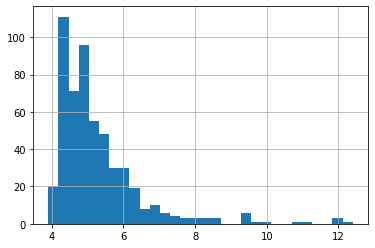

In [17]:
gw1_v1_player_predictions['next_match_value'].hist(bins=30)

In [18]:
gw1_v1_player_predictions[gw1_v1_player_predictions['next_match_value'] < 4.1].shape

(19, 14)

In [19]:
gw1_v1_player_predictions['low_value_player'] = np.where(
    gw1_v1_player_predictions['next_match_value'] < 4.1,
    1,
    0
)

In [20]:
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team,low_value_player
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,Manchester City,12.1,24.246344,1.0,0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,Liverpool,12.4,23.847819,1.0,0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,Manchester City,10.1,23.476229,1.0,0
3,sadio_mané,4.638364,4.476446,4.472850,4.407075,4.266582,0,0,0,1,Liverpool,11.9,22.261316,0.0,0
4,pierre_emerick_aubameyang,4.046014,3.921435,3.928114,3.877575,3.754090,0,1,0,0,Arsenal,11.1,19.527227,0.0,0


In [21]:
#budget = gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()
#budget = budget + 0.1  # money in the bank
#budget

In [22]:
budget = 98.7
budget

98.7

## Pick team

In [23]:
from pulp import *

In [24]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [25]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,sadio_mané,4.638364,4.476446,4.472850,4.407075,4.266582,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pierre_emerick_aubameyang,4.046014,3.921435,3.928114,3.877575,3.754090,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
players = list(gw1_v1_player_predictions['name'])

In [27]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [28]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [29]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [30]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [31]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [32]:
"""
in_top_3 = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_top_3']
    )
)
"""

"\nin_top_3 = dict(\n    zip(\n        gw1_v1_player_predictions['name'],\n        gw1_v1_player_predictions['in_top_3']\n    )\n)\n"

In [33]:
low_value_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['low_value_player']
    )
)

In [34]:
prob = LpProblem('FPL team selection', LpMaximize)

In [35]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [36]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

## TODO: Need to work out what deduction is made on sales
Currently have to add 0.1 to budget constraint so that same team is selected

In [37]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= budget + 0.1, "Total cost less than X"

#prob += lpSum([costs[p] * player_vars[p] for p in players]) >= (budget - 0.2), "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

#prob += lpSum(in_top_3[p] * player_vars[p] for p in players) == 3, "Top 3 must be included"

prob += lpSum(low_value_flag[p] * player_vars[p] for p in players) == 1, "Include 1 low value player"

prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 14, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [38]:
prob.solve()

1

In [39]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_david_button = 1.0
player_diego_rico = 1.0
player_jack_grealish = 1.0
player_john_lundstram = 1.0
player_jordan_ayew = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_mathew_ryan = 1.0
player_mohamed_salah = 1.0
player_raheem_sterling = 1.0
player_teemu_pukki = 1.0
player_todd_cantwell = 1.0
player_virgil_van_dijk = 1.0


In [40]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
14,andrew_robertson,3.806952,3.672420,3.669223,3.614195,3.499117,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,virgil_van_dijk,3.762115,3.635102,3.635307,3.583318,3.469291,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,teemu_pukki,3.557307,3.471382,3.486069,3.448371,3.341293,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
23,jack_grealish,3.416957,3.280938,3.270402,3.214649,3.112442,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,mathew_ryan,3.308517,3.173470,3.161462,3.106085,3.007476,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39,john_lundstram,3.045409,2.940175,2.935634,2.889705,2.800732,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,jordan_ayew,3.072137,2.937766,2.921847,2.866654,2.776100,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
test_selection.sum()

name                                 raheem_sterlingmohamed_salahkevin_de_bruyneand...
GW_plus_1                                                                      49.9644
GW_plus_2                                                                      48.4024
GW_plus_3                                                                      48.4281
GW_plus_4                                                                      47.7488
GW_plus_5                                                                      46.2833
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
next_match_value                                                                  98.7
predictions                                

In [42]:
if test_selection.sum()['in_gw_1_team'] == 15:
    print("No transfers made.")
else:
    print(f"{15 - test_selection.sum()['in_gw_1_team']} transfers made.")

No transfers made.


In [43]:
test_selection[test_selection['low_value_player'] == 1]

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
282,david_button,0.74793,0.810202,0.860373,0.879428,0.869256,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Starting 11

In [44]:
# Unlikely to play due to injury
test_selection.loc[test_selection['name'] == 'todd_cantwell', 'predictions'] = -9999

# Prefer not to play (expert judgment):
test_selection.loc[test_selection['name'] == 'danny_ings', 'predictions'] = -9999

/anaconda3/envs/fpl_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
players = list(test_selection['name'])

In [46]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [47]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [48]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [49]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [50]:
prob = LpProblem('FPL team selection', LpMaximize)

In [51]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [52]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [53]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [54]:
prob.solve()

1

In [55]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_jack_grealish = 1.0
player_john_lundstram = 1.0
player_jordan_ayew = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_mathew_ryan = 1.0
player_mohamed_salah = 1.0
player_raheem_sterling = 1.0
player_teemu_pukki = 1.0
player_virgil_van_dijk = 1.0


In [56]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
14,andrew_robertson,3.806952,3.672420,3.669223,3.614195,3.499117,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,virgil_van_dijk,3.762115,3.635102,3.635307,3.583318,3.469291,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,teemu_pukki,3.557307,3.471382,3.486069,3.448371,3.341293,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
23,jack_grealish,3.416957,3.280938,3.270402,3.214649,3.112442,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,mathew_ryan,3.308517,3.173470,3.161462,3.106085,3.007476,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39,john_lundstram,3.045409,2.940175,2.935634,2.889705,2.800732,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,jordan_ayew,3.072137,2.937766,2.921847,2.866654,2.776100,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test_selection_11[test_selection_11['name'] != 'raheem_sterling']['GW_plus_1'].sum() + test_selection_11[test_selection_11['name'] == 'raheem_sterling']['GW_plus_1'].sum() * 2

46.3031108379364

In [58]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,raheem_sterling,1
1,mohamed_salah,1
2,kevin_de_bruyne,1
3,andrew_robertson,1
4,virgil_van_dijk,1
5,teemu_pukki,1
6,jack_grealish,1
7,mathew_ryan,1
8,john_lundstram,1
9,jordan_ayew,1


In [59]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,raheem_sterling,5.055562,4.876467,4.870928,4.798082,4.645304,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,mohamed_salah,4.961739,4.794001,4.792940,4.724760,4.574379,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,kevin_de_bruyne,4.883424,4.719241,4.718524,4.651514,4.503526,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,andrew_robertson,3.806952,3.672420,3.669223,3.614195,3.499117,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,virgil_van_dijk,3.762115,3.635102,3.635307,3.583318,3.469291,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,teemu_pukki,3.557307,3.471382,3.486069,3.448371,3.341293,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1.0
6,jack_grealish,3.416957,3.280938,3.270402,3.214649,3.112442,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
7,mathew_ryan,3.308517,3.173470,3.161462,3.106085,3.007476,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
8,john_lundstram,3.045409,2.940175,2.935634,2.889705,2.800732,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
9,jordan_ayew,3.072137,2.937766,2.921847,2.866654,2.776100,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [60]:
gw_selection_df[['name', 'predictions']]

,name,predictions
0,raheem_sterling,24.246344
1,mohamed_salah,23.847819
2,kevin_de_bruyne,23.476229
3,andrew_robertson,18.261908
4,virgil_van_dijk,18.085134
5,teemu_pukki,17.304422
6,jack_grealish,16.295388
7,mathew_ryan,15.757010
8,john_lundstram,14.611654
9,jordan_ayew,14.574504


In [61]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw11_v2_lstm_team_selections.parquet', index=False)